Dataset downloaded from: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey

The scope of this project is to predict the music generes, that people like basing on thier tastes and lifestyles.

IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("responses.csv")

In [3]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
# converting multiple music generes columns from Slow songs to metal etc. to only one column with the genres that particular person like 
# the most in this case the classification is 5 so if genere is equal to 5 then it will be appended to new column
genere = []
for index, row in df.iterrows():
    if row['Dance'] == 5:
        genere.append("Dance")
    elif row['Slow songs or fast songs'] == 5:
        genere.append("Slow songs or fast songs")
    elif row['Folk'] == 5:
        genere.append("Folk")
    elif row['Country'] == 5:
        genere.append("Country")
    elif row['Classical music'] == 5:
        genere.append("Classical music")
    elif row['Musical'] == 5:
        genere.append("Musical")
    elif row['Pop'] == 5:
        genere.append("Pop")
    elif row['Rock'] == 5:
        genere.append("Rock")
    elif row['Metal or Hardrock'] == 5:
        genere.append("Metal or Hardrock")
    elif row['Punk'] == 5:
        genere.append("Punk")
    elif row['Hiphop, Rap'] == 5:
        genere.append("Hiphop, Rap")
    elif row['Reggae, Ska'] == 5:
        genere.append("Reggae, Ska")
    elif row['Swing, Jazz'] == 5:
        genere.append("Swing, Jazz")
    elif row['Rock n roll'] == 5:
        genere.append("Rock n roll")
    elif row['Alternative'] == 5:
        genere.append("Alternative")
    elif row['Latino'] == 5:
        genere.append("Latino")
    elif row['Techno, Trance'] == 5:
        genere.append("Techno, Trance")
    elif row['Opera'] == 5:
        genere.append("Opera")
    else:
        genere.append(None)
df["Genere"] = genere

In [5]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [6]:
df.isnull()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Genere
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df = df.dropna()

In [8]:
df = df.drop(["Left - right handed","Village - town","House - block of flats","Smoking","Punctuality","Lying","Internet usage","Horror","Thriller","Comedy","Romantic"], axis=1)

In [9]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x =="female" else 1)
df['Only child'] = df['Only child'].apply(lambda x: True if x =="yes" else False)
df['Alcohol'] = df['Alcohol'].apply(lambda x: 1 if x =="drink a lot" else 0.5 if x =="social drinker" else 0)
df['Education'] = df['Education'].apply(lambda x: 3 if x =="college/bachelor degree" or x =="master" else 2 if x =="secondary school" else 0)

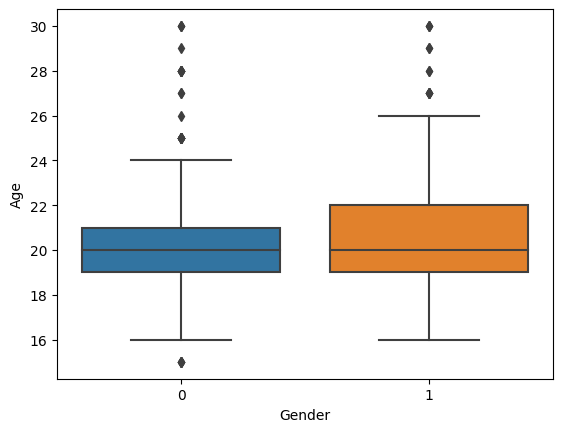

In [10]:
#more males were asked then females
# female ages [16-24] male ages [16-26] biggest concentration of both genders around 19-21
sns.boxplot(df,x="Gender",y="Age")
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_15436\1569393361.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

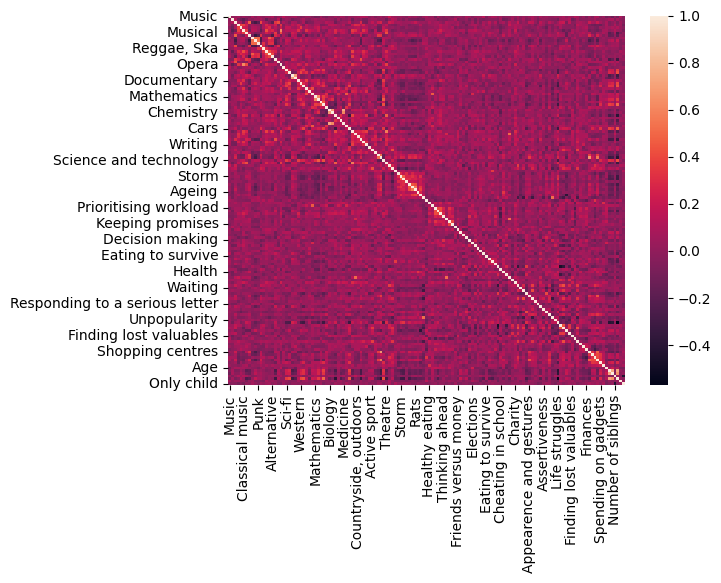

In [11]:
#show correlation
sns.heatmap(df.corr())

In [12]:
X = df.drop(['Genere'], axis=1)
y = df[['Genere']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

C:\Users\danie\AppData\Local\Temp\ipykernel_15436\2662264645.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [15]:
model.score(X_test, y_test)

0.8482142857142857

<Axes: >

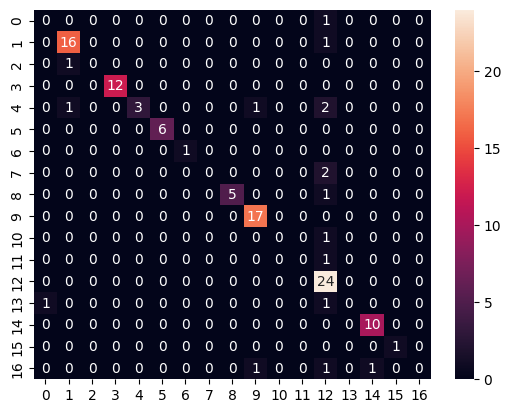

In [16]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, model.predict(X_test))), annot=True)

In [17]:
#random part of dataframe to check music genere prediction model on
df.iloc[45:53]

#df.to_csv('out.csv', index=False) #just checking how the file looks like

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Education,Only child,Genere
66,4.0,3.0,4.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,...,4,5.0,20.0,183.0,83.0,1.0,1,2,False,Pop
67,3.0,4.0,4.0,3.0,2.0,2.0,4.0,5.0,1.0,1.0,...,1,3.0,24.0,160.0,58.0,0.0,0,3,True,Pop
68,5.0,5.0,3.0,2.0,1.0,2.0,4.0,3.0,5.0,5.0,...,4,4.0,18.0,162.0,50.0,1.0,0,3,False,Slow songs or fast songs
70,5.0,3.0,5.0,2.0,2.0,2.0,3.0,5.0,3.0,1.0,...,3,3.0,17.0,185.0,82.0,1.0,1,2,True,Dance
73,5.0,3.0,3.0,2.0,2.0,2.0,1.0,5.0,2.0,1.0,...,2,2.0,21.0,177.0,80.0,1.0,1,2,True,Pop
74,5.0,3.0,2.0,1.0,4.0,5.0,3.0,2.0,1.0,1.0,...,1,1.0,22.0,190.0,80.0,1.0,1,0,False,Classical music
75,5.0,3.0,3.0,4.0,4.0,3.0,1.0,1.0,5.0,4.0,...,4,5.0,20.0,192.0,77.0,1.0,1,2,False,Rock
77,5.0,3.0,5.0,1.0,2.0,2.0,2.0,5.0,4.0,2.0,...,2,5.0,21.0,175.0,60.0,1.0,0,2,False,Dance


In [18]:
final_test = df.iloc[45:53].drop(["Genere"],axis=1)
final_test

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Education,Only child
66,4.0,3.0,4.0,2.0,2.0,2.0,4.0,5.0,3.0,4.0,...,2.0,4,5.0,20.0,183.0,83.0,1.0,1,2,False
67,3.0,4.0,4.0,3.0,2.0,2.0,4.0,5.0,1.0,1.0,...,2.0,1,3.0,24.0,160.0,58.0,0.0,0,3,True
68,5.0,5.0,3.0,2.0,1.0,2.0,4.0,3.0,5.0,5.0,...,4.0,4,4.0,18.0,162.0,50.0,1.0,0,3,False
70,5.0,3.0,5.0,2.0,2.0,2.0,3.0,5.0,3.0,1.0,...,3.0,3,3.0,17.0,185.0,82.0,1.0,1,2,True
73,5.0,3.0,3.0,2.0,2.0,2.0,1.0,5.0,2.0,1.0,...,4.0,2,2.0,21.0,177.0,80.0,1.0,1,2,True
74,5.0,3.0,2.0,1.0,4.0,5.0,3.0,2.0,1.0,1.0,...,5.0,1,1.0,22.0,190.0,80.0,1.0,1,0,False
75,5.0,3.0,3.0,4.0,4.0,3.0,1.0,1.0,5.0,4.0,...,4.0,4,5.0,20.0,192.0,77.0,1.0,1,2,False
77,5.0,3.0,5.0,1.0,2.0,2.0,2.0,5.0,4.0,2.0,...,5.0,2,5.0,21.0,175.0,60.0,1.0,0,2,False


In [19]:
pd.DataFrame(model.predict(final_test))

,0
0,Pop
1,Pop
2,Slow songs or fast songs
3,Dance
4,Pop
5,Classical music
6,Rock
7,Dance


In [20]:
pd.DataFrame(df[df == 5].iloc[:,1:19].count())

,0
Slow songs or fast songs,58
Dance,88
Folk,33
Country,22
Classical music,99
Musical,81
Pop,147
Rock,231
Metal or Hardrock,76
Punk,55


Conclusion

The algorithm used for this project was the RandomForestClassifier.
The model accuracy is of 84.82%. It can be said that the scope of predicting persons' music preferences has been achieved with the margin of error of ~15%.
The Reggae, Ska genre is where the algorithm is performing the worst, maybe because it has not that many 5 points reviews as the other genres, thus the dataset is too small to learn from it.